## Compare Train/Test split with LOOCV using FF with 2 Hidden Layers

Como o dataset possui poucas linhas de dados, foi comparado a tecnica da separação por train/test com a Leave-one-out Cross Validation (LOOCV)

In [1]:
import tcc_utils
import tratamento_dados_empresa
from keras.initializers import glorot_normal as gl_normal, glorot_uniform as gl_uni, RandomUniform as rnd_uni

x_csv_path = '../data/grendene-indicadores-financeiros-raw.csv'
y_csv_path = '../data/grendene-cotacao-raw.csv'

X = tratamento_dados_empresa.treat_economatica_indicadores_financeiros(x_csv_path)

# Spliting test / train and Feature Scaling
x_train, x_test, y_train, y_test, x_scaler, y_scaler = tratamento_dados_empresa. \
    get_scaled_splits_and_scaler(x_csv_path, y_csv_path, 0.2, 0)

number_hidden_layer = round(x_train.shape[1]*1.5)

Using TensorFlow backend.


### 1) Train / test split

80% train / 20% test / 0% validation split


**Feed forward with 2 hidden layers**

**kernel_initializer:** glorot_normal

**layers:** input(X columns), (X columns * 1.5), (X columns * 1.5), output(1)

**activations:** input(none), 'relu', 'relu', output(none)

**optimizer:** adam

**loss:** MSE

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 84)                4788      
_________________________________________________________________
dense_2 (Dense)              (None, 84)                7140      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 85        
Total params: 12,013
Trainable params: 12,013
Non-trainable params: 0
_________________________________________________________________
None


<Figure size 576x432 with 0 Axes>

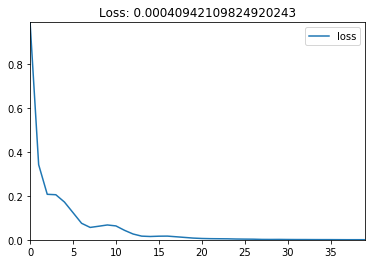

MSE of training: 0.0003501360770314932
MSE of testing: 0.11770818382501602
    Prediction      Real     % error
8     7.357053  8.491036   13.355057
0     6.832527  8.075241   15.389185
7     5.478199  5.156991    6.228610
9     4.248278  4.785659   11.228990
2     5.193058  4.616062   12.499729
1     2.932113  3.669486   20.094721
6     3.758461  3.491649    7.641442
3     2.764557  3.003443    7.953732
10    1.137097  1.377930   17.477895
5     2.456498  0.900556  172.775599
4    -0.488857  0.667981  173.184287


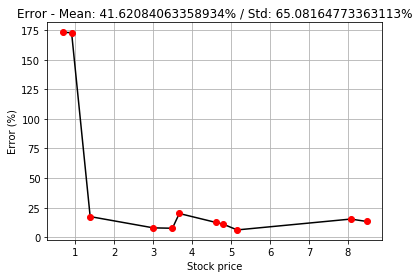

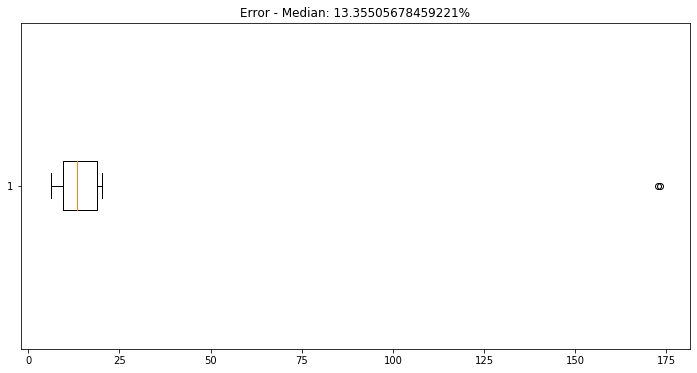

count     11.000000
mean      41.620841
std       65.081648
min        6.228610
25%        9.591361
50%       13.355057
75%       18.786308
max      173.184287
Name: % error, dtype: float64


In [2]:
# Keras Initializer with seed
glorot_normal = gl_normal(seed=0)
# Neural Network layers
layers = [number_hidden_layer, number_hidden_layer]
activations = ['relu', 'relu']
# Create model
deep_model = tcc_utils.deep_model(x_train, glorot_normal, layers, activations)
# Fit model
deep_history = deep_model.fit(x_train, y_train, epochs=40, verbose=0)
# Evaluating model
tcc_utils.evaluate_model(deep_model, deep_history, x_train, y_train,
                         x_test, y_test, X, y_scaler)

### LOOCV implementation

### 2) K-Fold Cross Validation where test set = 1 row (LOOCV)

Training and gathering results for 55 iterations

**Feed forward with 2 hidden layers**

**kernel_initializer:** glorot_normal

**layers:** input(X columns), (X columns * 1.5), (X columns * 1.5), output(1)

**activations:** input(none), 'relu', 'relu', output(none)

**optimizer:** adam

**loss:** MSE

Training K-Fold: 1/55
Training K-Fold: 2/55
Training K-Fold: 3/55
Training K-Fold: 4/55
Training K-Fold: 5/55
Training K-Fold: 6/55
Training K-Fold: 7/55
Training K-Fold: 8/55
Training K-Fold: 9/55
Training K-Fold: 10/55
Training K-Fold: 11/55
Training K-Fold: 12/55
Training K-Fold: 13/55
Training K-Fold: 14/55
Training K-Fold: 15/55
Training K-Fold: 16/55
Training K-Fold: 17/55
Training K-Fold: 18/55
Training K-Fold: 19/55
Training K-Fold: 20/55
Training K-Fold: 21/55
Training K-Fold: 22/55
Training K-Fold: 23/55
Training K-Fold: 24/55
Training K-Fold: 25/55
Training K-Fold: 26/55
Training K-Fold: 27/55
Training K-Fold: 28/55
Training K-Fold: 29/55
Training K-Fold: 30/55
Training K-Fold: 31/55
Training K-Fold: 32/55
Training K-Fold: 33/55
Training K-Fold: 34/55
Training K-Fold: 35/55
Training K-Fold: 36/55
Training K-Fold: 37/55
Training K-Fold: 38/55
Training K-Fold: 39/55
Training K-Fold: 40/55
Training K-Fold: 41/55
Training K-Fold: 42/55
Training K-Fold: 43/55
Training K-Fold: 44/

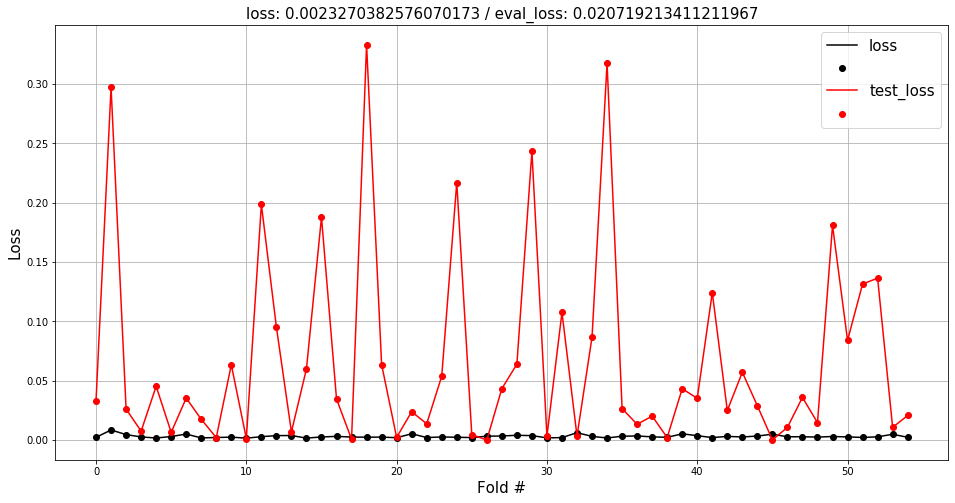

    Prediction      Real     % error
7     8.301449  8.770985    5.353286
25    7.327536  8.491036   13.702690
44    7.837957  8.434865    7.076680
11    8.195357  8.106093    1.101207
16    6.992793  8.075241   13.404533
39    7.816238  7.930000    1.434572
36    8.100210  7.693247    5.289882
17    8.131017  7.666291    6.061944
4     7.300678  7.084401    3.052859
28    7.437642  6.917610    7.517500
19    7.370084  5.928323   24.319881
20    4.651456  5.281612   11.931118
54    5.415174  5.156991    5.006464
34    4.165058  4.900166   15.001696
55    4.434917  4.794493    7.499780
1     4.330519  4.785659    9.510500
8     4.433320  4.764059    6.942382
37    4.462188  4.749780    6.054852
15    5.227693  4.616062   13.250056
6     4.772992  4.571799    4.400726
35    5.971953  4.564561   30.833010
5     5.037523  4.505757   11.801909
32    5.311590  4.492191   18.240502
12    3.215219  4.328178   25.714259
26    4.466844  4.297708    3.935491
29    3.038006  3.669486   17.208958
2

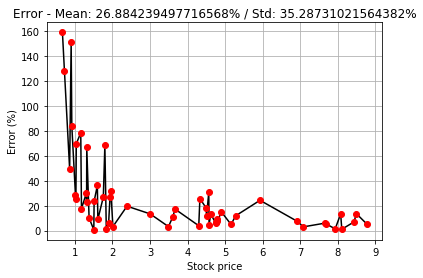

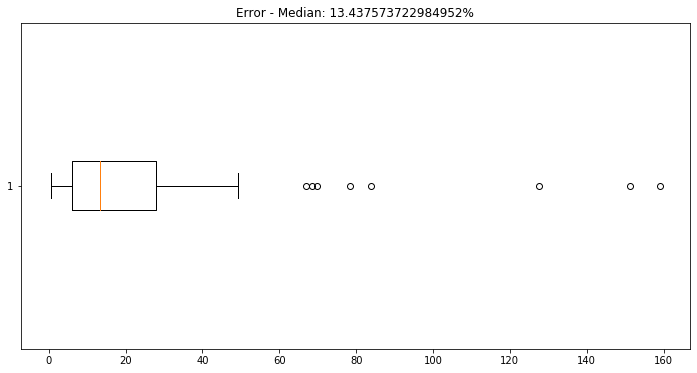

count     55.000000
mean      26.884239
std       35.287310
min        0.587289
25%        6.149850
50%       13.437574
75%       27.872120
max      159.018940
Name: % error, dtype: float64

Execution time
CPU times: user 2min 13s, sys: 5.86 s, total: 2min 19s
Wall time: 2min 44s


In [3]:
%%time

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

# Get X and Y datasets
x, y = tratamento_dados_empresa.get_x_y(x_csv_path, y_csv_path)

# Feature Scaling X
x_scaler = StandardScaler()
x = x_scaler.fit_transform(x)
# Feature Scaling y
y_scaler = StandardScaler()
y = y_scaler.fit_transform(y)

# LOOCV: k-fold cross validation (folds=x.shape[0], shuffle=True, seed=1)
kfold = KFold(x.shape[0], True, 1)

# Neural Network layers
layers = [number_hidden_layer, number_hidden_layer]
activations = ['relu', 'relu']

# Run LOOCV and get results
results_loss, results_evaluate, prediction_results = tcc_utils.loocv(x, y, kfold, gl_normal, 
                                                                     layers, activations, y_scaler)

# Evaluate results
tcc_utils.plot_loss_eval(results_loss, results_evaluate)
tcc_utils.show_results(prediction_results)

print('')
print('Execution time')

In [4]:
# Evaluation Loss Mean
results_evaluate.mean()

0.0672799715867024

In [5]:
# Evaluation Loss Std
results_evaluate.std()

0.08425968972682807